### Please comment the following line if you are not running this code on Colab.

In [226]:
#!pip install transformers

### Importing Libraries

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## TASKS

# **1. Data Exploration**

In [228]:
df = pd.read_csv('mailData.csv')
df.head(5)

,Classification,Attachment Count,Attachment Extension,Email From,Email Subject
0,NotSpam,0.0,NaN,John the classic Doe <john.doe@example.com>,Meeting Tomorrow
1,Spam,2.0,"pdf,ics",Xavier Exampler <xavier@example.net>,Claim Your Prize Now!
2,NotSpam,1.0,docx,info@company.com,Weekly Newsletter
3,Spam,NaN,NaN,"\How to deal with toxic employees\"" <campaign@...",Managing Toxic & Other employees who have atti...
4,Spam,NaN,NaN,"No reply"" <noreply@lottery.org>""",You've Won $1000000!


In [229]:
df["Email From"].head()

0          John the classic Doe <john.doe@example.com>
1                 Xavier Exampler <xavier@example.net>
2                                     info@company.com
3    \How to deal with toxic employees\" <campaign@...
4                     No reply" <noreply@lottery.org>"
Name: Email From, dtype: object

# **2. Data Cleaning**

---

## 'EMAIL FROM' Manipulation

#### Length Extraction from 'Email From'

In [230]:
df['Email_From_Length'] = df['Email From'].apply(len)
df 

,Classification,Attachment Count,Attachment Extension,Email From,Email Subject,Email_From_Length
0,NotSpam,0.0,NaN,John the classic Doe <john.doe@example.com>,Meeting Tomorrow,43
1,Spam,2.0,"pdf,ics",Xavier Exampler <xavier@example.net>,Claim Your Prize Now!,36
2,NotSpam,1.0,docx,info@company.com,Weekly Newsletter,16
3,Spam,NaN,NaN,"\How to deal with toxic employees\"" <campaign@...",Managing Toxic & Other employees who have atti...,68
4,Spam,NaN,NaN,"No reply"" <noreply@lottery.org>""",You've Won $1000000!,32
...,...,...,...,...,...,...
263,Spam,0.0,'',specials@discounts.com,Exclusive Offers Just for You,22
264,Spam,NaN,NaN,discounts@sales.com,Unlock Special Discounts Now,19
265,Spam,1.0,pdf,promotions@deals.com,'Special Offers Await You',20
266,NotSpam,NaN,NaN,"'""Sistema de Facturación"" <facturacion@servici...",Confirmación de pago y recibo adjunto,53


In [231]:
import pandas as pd
from email.utils import parseaddr

# Función para extraer el TLD del correo electrónico, manejando comillas dobles
def extract_tld(email):
    # Eliminar las comillas dobles del principio y del final, si las hay
    email = email.replace('"', '')
    # Analizar la dirección de correo electrónico para separar el nombre y la dirección
    name, address = parseaddr(email)
    # Dividir la dirección por '@' y tomar la parte del dominio
    domain = address.split('@')[-1] if '@' in address else ''
    # Dividir el dominio por '.' y tomar la última parte para el TLD
    tld = domain.split('.')[-1] if domain else ''
    return tld

# Suponiendo que 'df' es tu DataFrame y 'Email From' es la columna con direcciones de correo electrónico
# Aplicar la función a la columna 'Email From' y actualizar la columna 'TLD'
df['TLD'] = df['Email From'].apply(extract_tld)

# Mostrar el DataFrame actualizado con la nueva columna 'TLD'
print(df[['Email From', 'TLD']])
df.to_csv('email_domains.csv',index = False)
df


                                            Email From  TLD
0          John the classic Doe <john.doe@example.com>  com
1                 Xavier Exampler <xavier@example.net>  net
2                                     info@company.com  com
3    \How to deal with toxic employees\" <campaign@...  com
4                     No reply" <noreply@lottery.org>"  org
..                                                 ...  ...
263                             specials@discounts.com  com
264                                discounts@sales.com  com
265                               promotions@deals.com  com
266  '"Sistema de Facturación" <facturacion@servici...  com
267                               ventas@ecommerce.com  com

[268 rows x 2 columns]


,Classification,Attachment Count,Attachment Extension,Email From,Email Subject,Email_From_Length,TLD
0,NotSpam,0.0,NaN,John the classic Doe <john.doe@example.com>,Meeting Tomorrow,43,com
1,Spam,2.0,"pdf,ics",Xavier Exampler <xavier@example.net>,Claim Your Prize Now!,36,net
2,NotSpam,1.0,docx,info@company.com,Weekly Newsletter,16,com
3,Spam,NaN,NaN,"\How to deal with toxic employees\"" <campaign@...",Managing Toxic & Other employees who have atti...,68,com
4,Spam,NaN,NaN,"No reply"" <noreply@lottery.org>""",You've Won $1000000!,32,org
...,...,...,...,...,...,...,...
263,Spam,0.0,'',specials@discounts.com,Exclusive Offers Just for You,22,com
264,Spam,NaN,NaN,discounts@sales.com,Unlock Special Discounts Now,19,com
265,Spam,1.0,pdf,promotions@deals.com,'Special Offers Await You',20,com
266,NotSpam,NaN,NaN,"'""Sistema de Facturación"" <facturacion@servici...",Confirmación de pago y recibo adjunto,53,com


---

#   **2.1 Corpus Creation**

#### Reading text file

  We used webscraper to obtain the complete scripts of toy story movies 1 and 2. After that, we downloaded them in csv format and proceed to clean this with the aid of PlainTextReader(we had to change our way of reading as Colab had problems when reading this files).

In [232]:
# Raw text from our files obtained via web scraper
url1 = 'https://raw.githubusercontent.com/mau-JS/NLP-Project/main/toyStory1.csv'


# Reading the CSV files from github
corpus1 = requests.get(url1)


# Extracting the text data(For some reason plain text reader had issues when used in colab, thus we used an alternative for that)
text1 = corpus1.text


#This will be our corpus
raw_text = text1

#### Word tokenization

We perform tokenization on our text to facilitate language processing. This step is essential for our understanding of the text. After that we print the first 50 tokens.

In [233]:
# Tokenizing the text and converting it to lowercase
tokens = nltk.word_tokenize(raw_text)
tokens = [word.lower() for word in tokens]

print(tokens[:50])

['\ufeff01', 'sheriff', 'woody', '[', ']', '[', 'the', 'walt', 'disney', 'pictures', 'logo', 'plays', ',', 'except', 'the', 'castle', 'is', 'in', 'cgi', ',', 'while', 'the', 'camera', 'zooms', 'out', 'from', 'its', 'gate', '.', 'when', 'the', 'logo', 'completes', ',', 'it', 'zooms', 'out', 'until', 'it', 'fades', 'into', 'a', 'kid', "'s", 'bedroom', ',', 'with', 'boxes', 'made', 'to']


#### Sentence Tokenization

Same as before, we prepare a sentence tekonzation to facilitate language processing if needed.After that we print the first 10 identified sentences.

In [234]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['\ufeff01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the camera zooms out from its gate.', "When the logo completes, it zooms out until it fades into a kid's bedroom, with boxes made to look like buildings which are placed in different areas.", 'A kid, Andy Davis, holds a Mr.', 'Potato Head toy in front of one of them]\nAndy (as One-Eyed Bart): Alright, everyone!', 'This is a stick-up!', "Don't anybody move!", 'Now empty that safe!', '[Andy shakes a piggy bank (Hamm) and a few coins fall out]\nAndy (as One-Eyed Bart): [chuckles] Money, money, money!', '[Andy makes Potato Head (One-Eyed Bart] ""kiss"" the coins]\nAndy (as Bo Peep): Stop it!', 'Stop it, you mean old potato!']


---

#### POS Tagging

As part of our process, we will apply Part-of-Speech (POS) tagging. This technique will help us assign the appropriate grammatical category to each word, providing valuable information about the structure of our corpus. POS tagging will aid in disambiguating words that can have multiple meanings based on their usage.

In [235]:
# Defining a function to convert NLTK's POS tags to wordnet's POS tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Use noun as a default

# Applying POS tagging
pos_tags = nltk.pos_tag(tokens)

---

#### Lemmatization

Through the process of lemmatization, we will group words with the same root to facilitate their analysis. Prior to lemmatization, we will remove all stopwords to ensure our analysis is relevant and not influenced by noise. Lemmatization allows us to simplify our text, enhancing the efficiency and accuracy of our subsequent tasks.

In [236]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if word.isalpha() and word.lower() not in stop_words]
# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)
print(lemmatized_tokens[:100])

['sheriff', 'woody', 'walt', 'disney', 'picture', 'logo', 'play', 'except', 'castle', 'cgi', 'camera', 'zoom', 'gate', 'logo', 'complete', 'zoom', 'fade', 'kid', 'bedroom', 'box', 'make', 'look', 'like', 'building', 'place', 'different', 'area', 'kid', 'andy', 'davis', 'hold', 'mr', 'potato', 'head', 'toy', 'front', 'one', 'andy', 'bart', 'alright', 'everyone', 'anybody', 'move', 'empty', 'safe', 'andy', 'shake', 'piggy', 'bank', 'hamm', 'coin', 'fall', 'andy', 'bart', 'chuckle', 'money', 'money', 'money', 'andy', 'make', 'potato', 'head', 'bart', 'kiss', 'coin', 'andy', 'bo', 'peep', 'stop', 'stop', 'mean', 'old', 'potato', 'andy', 'bart', 'quiet', 'bo', 'peep', 'sheep', 'get', 'run', 'sheep', 'toy', 'car', 'track', 'andy', 'set', 'room', 'andy', 'sheep', 'help', 'baa', 'help', 'u', 'andy', 'bo', 'peep', 'oh', 'sheep', 'somebody']


#### Word Frequency

We will find out what words are being used the most in our movies.

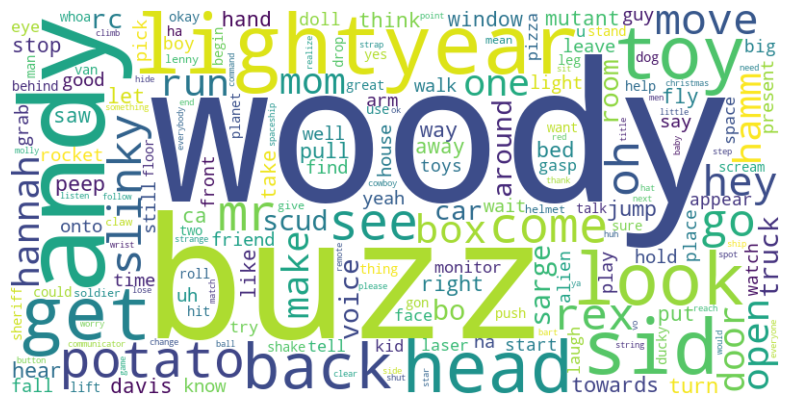

In [237]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

woody: 675 times
buzz: 505 times
andy: 194 times
lightyear: 178 times
sid: 149 times
get: 139 times
toy: 138 times
look: 136 times
head: 135 times
back: 102 times


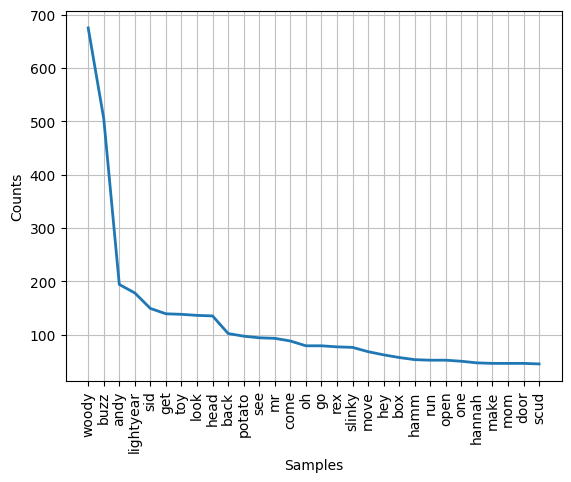

In [238]:
# We get the 10 most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

Certain sequences of words can occur more frequently than would be expected by chance. These are words that can be used together in a way that sounds natural. Identifying them can help us on tasks such as information retrieval.

##### Bigrams

We will analyze bigrams in our corpus, which are sequences of two adjacent elements from our tokens. We will also print the 10 most common bigrams in our text, sorted in descending order of frequency.


In [239]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of bigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('buzz', 'lightyear'): 0.01624815361890694
('potato', 'head'): 0.008862629246676515
('mr', 'potato'): 0.00793943870014771
('woody', 'buzz'): 0.0052621861152141805
('bo', 'peep'): 0.002861890694239291
('mutant', 'toy'): 0.002307976366322009
('andy', 'mom'): 0.0021233382570162483
('buzz', 'buzz'): 0.0021233382570162483
('woody', 'look'): 0.0021233382570162483
('voice', 'box'): 0.0020310192023633676


##### Trigrams

We will analyze trigrams in our corpus, which are sequences of three adjacent elements from our tokens. We will also print the 10 most common trigrams in our text, sorted in descending order of frequency.

In [240]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigrams divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('mr', 'potato', 'head'): 0.00793943870014771
('buzz', 'lightyear', 'woody'): 0.001292466765140325
('woody', 'voice', 'box'): 0.001292466765140325
('head', 'mr', 'potato'): 0.0009231905465288035
('potato', 'head', 'mr'): 0.0009231905465288035
('buzz', 'buzz', 'lightyear'): 0.0007385524372230429
('buzz', 'lightyear', 'buzz'): 0.0006462333825701625
('toy', 'buzz', 'lightyear'): 0.0005539143279172822
('woody', 'buzz', 'lightyear'): 0.0005539143279172822
('woody', 'buzz', 'look'): 0.0005539143279172822
